In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
iris = load_iris()


In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target = pd.DataFrame(data=iris.target, columns=["species"])


def converter(specie):
    if specie == 0:
        return "setosa"
    elif specie == 1:
        return "versicolor"
    else:
        return "virginica"


target["species"] = target["species"].apply(converter)
df = pd.concat([df, target], axis=1)


In [4]:
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


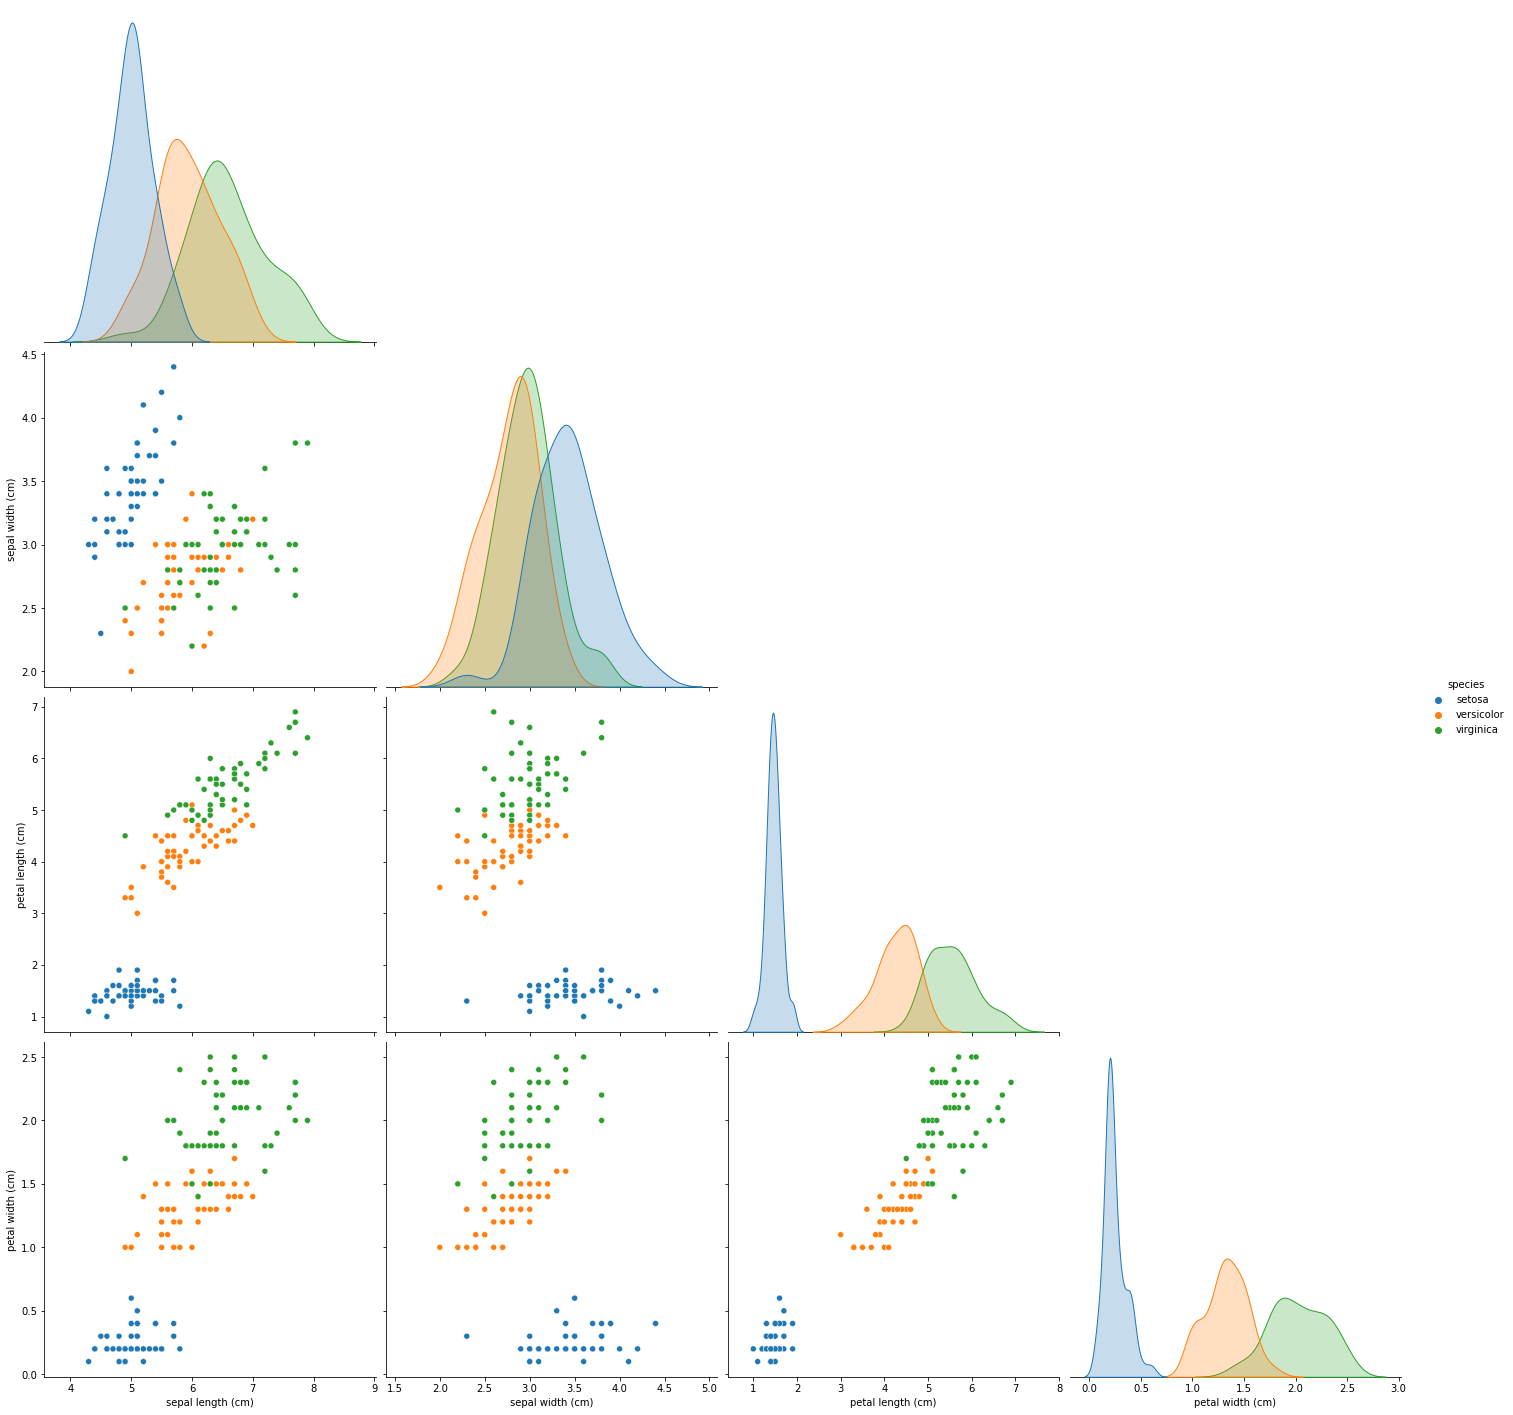

In [6]:
sns.pairplot(df, hue="species", corner=True, height=5)


In [7]:
df.drop("species", axis=1, inplace=True)
target = pd.DataFrame(data=iris.target, columns=["species"])
df = pd.concat([df, target], axis=1)


In [8]:
x = df.drop("sepal length (cm)", axis=1)
y = df["sepal length (cm)"].values.reshape(-1, 1)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x, y)
y_pred = regressor.predict(x_test)


In [10]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error : ", np.sqrt(
    metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score : ", metrics.r2_score(y_test, y_pred))


Mean Absolute Error :  0.2661854809605703
Mean Squared Error :  0.10091861300502956
Root Mean Squared Error :  0.3176769003327588
R2 Score :  0.8015843417849384


In [11]:
regressor.coef_


array([[ 0.62527882,  0.74292448, -0.40447855, -0.22635635]])